In [1]:
import vnstock as vn
from prophet import Prophet # Prophet dự đoán dựa theo thời vụ nên maybe tốt hơn Linear Regression 
from prophet.plot import plot_plotly
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt

d:\ATTACKER\Attacker-2024\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data
START = "2019-01-01"
END = "2024-02-01"
def load_data(ticker):
        data = vn.stock_historical_data(ticker, START, END)    
        return data
data = load_data('VCB')
data.sample(5)

,time,open,high,low,close,volume,ticker
908,2022-08-22,67820,69010,67740,67740,525800,VCB
1223,2023-11-22,86300,86700,85500,86700,1012700,VCB
311,2020-04-06,43910,44430,42930,44230,2111200,VCB
1183,2023-09-27,87600,89000,87000,87800,1204900,VCB
280,2020-02-20,58350,58810,58030,58220,541120,VCB


## Predict Close Price of each stock in portfolio (unit week)



In [3]:
n_weeks = int(input("Enter the predicted number of weeks: "))
period = n_weeks * 7
df_train = data[['time', 'close']]
df_train = df_train.rename(columns={"time": "ds", "close":"y"}) #Rename thành "ds" với "y" vì mô hình Prophet bắt buộc

# Use the Prophet model for training
m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(period)
forecast = m.predict(future)

20:13:37 - cmdstanpy - INFO - Chain [1] start processing
20:13:38 - cmdstanpy - INFO - Chain [1] done processing


## Visualization:

3 biểu đồ đều giống nhau, 2 biểu đồ sau để tương tác dễ dàng hơn.

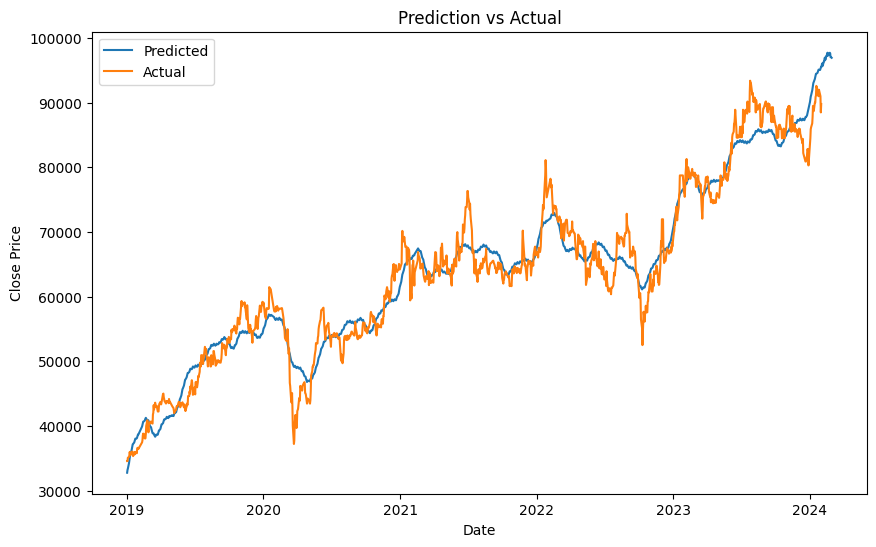

In [4]:
# # Chart 1
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.plot(df_train['ds'], df_train['y'], label='Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

In [5]:
# Chart 2
trace1 = go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted')
trace2 = go.Scatter(x=df_train['ds'], y=df_train['y'], name='Actual')
data = [trace1, trace2]

layout = go.Layout(
    title='Prediction vs Actual',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Close Price'),
    legend=dict(x=0.7, y=0.9)
)

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [6]:
# Chart 3
fig1 = plot_plotly(m, forecast)
fig1.update_layout(
    title='Prediction vs Actual',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Close Price'),
    legend=dict(x=0.7, y=0.9)
)

pyo.plot(fig1)


'temp-plot.html'